# Laboratorium 2


### Konfiguracja

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js
import random

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [11]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


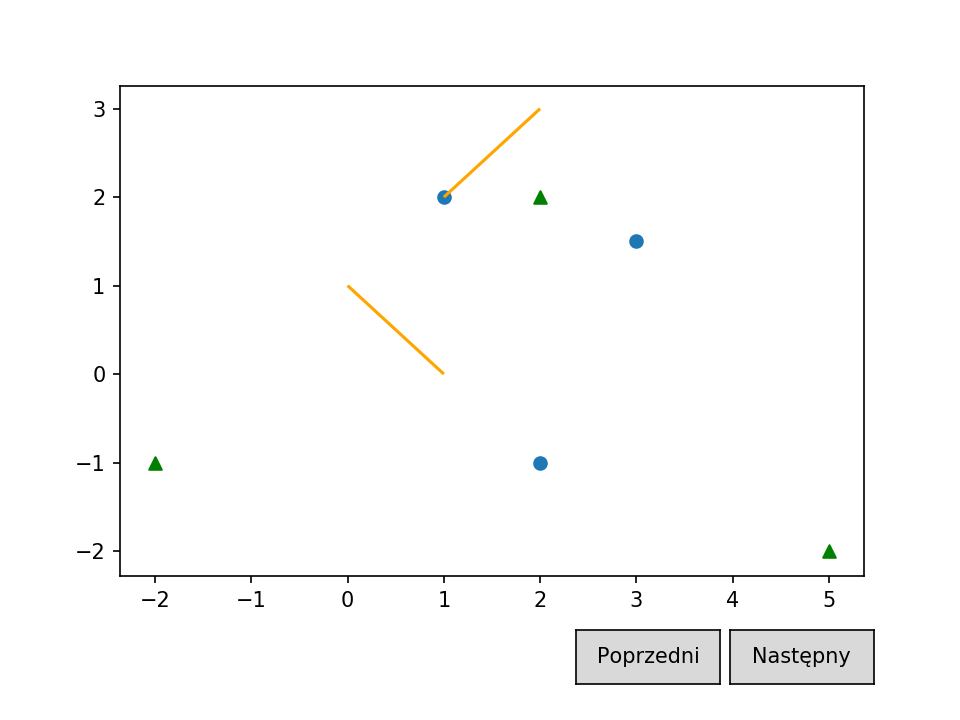

In [12]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Rozwiązanie

### Zadanie 1

In [13]:
%matplotlib notebook

def generate100RandomPointsBetween_100And100():
    points = PointsCollection([(random.uniform(-100, 100), random.uniform(-100, 100)) for i in range(100)])
    return points
    
def generate100RandomPointsOnCircleOf10Radius():
    R = 10
    random_fi = [random.uniform(0, 2*np.pi) for i in range(100)]
    points = PointsCollection([(10*np.cos(t), 10*np.sin(t)) for t in random_fi])
    return points
    
def generate100RandomPointsOnRectangle():
    x1 = (-10, -10)
    x2 = (10, -10)
    y1 = (-10, 10)
    
    v1 = (0, 20)
    v2 = (20, 0)
    
    preparing_points = []
    
    for index in range(100):
        t = random.randint(0, 1000)
    
        if t < 250:
            new_point = (x1[0], x1[1]+v1[1]*random.uniform(0, 1))
        elif t < 500:
            new_point = (x2[0], x2[1]+v1[1]*random.uniform(0, 1))
        elif t < 750:
            new_point = (x1[0]+v2[0]*random.uniform(0, 1), x1[1])
        else:
            new_point = (y1[0]+v2[0]*random.uniform(0, 1), y1[1])
        
        preparing_points.append(new_point)
    points = PointsCollection(preparing_points)
    return points

def generate49RandomPointsOnSquare():
    x1 = (0,0)
    x2 = (10, 0)
    y2 = (10, 10)
    y1 = (0, 10)
    preparing_points = [x1, x2, y2, y1]
    
    preparing_points += generate25RandomPointsOnAxises()
    preparing_points += generate20PointsOnDiagonals()
    
    points = PointsCollection(preparing_points)
    return points

def generate25RandomPointsOnAxises():
    preparing_points = []
    for i in range(25):
        t = random.uniform(-100, 100)
    
        if t < 0:
            new_point_x = (np.sign(t)*t)%11
            if new_point_x > 10:
                new_point_x -= random.uniform(1, 9)
            preparing_points.append((new_point_x,0))
        else:
            new_point_y = (np.sign(t)*t)%11
            if new_point_y > 10:
                new_point_y -= random.uniform(1, 9)
            preparing_points.append((0, new_point_y)) 
    return preparing_points
    
def generate20PointsOnDiagonals():
    x1 = (0,0)
    x2 = (10, 0)
    diagonal_vector1 = (10, 10)
    diagonal_vector2 = (-10, 10)
    preparing_points = []
    
    for i in range(20):
        random_number = random.uniform(-100, 100)
        t = random.uniform(0, 1)

        if random_number < 0:
            point = (x1[0] + t*diagonal_vector1[0], x1[1]+t*diagonal_vector1[1])
        else:
            point = (x2[0] + t*diagonal_vector2[0], x2[1]+t*diagonal_vector2[1])
        preparing_points.append(point)
    return preparing_points



### Zadanie 2

<IPython.core.display.Javascript object>


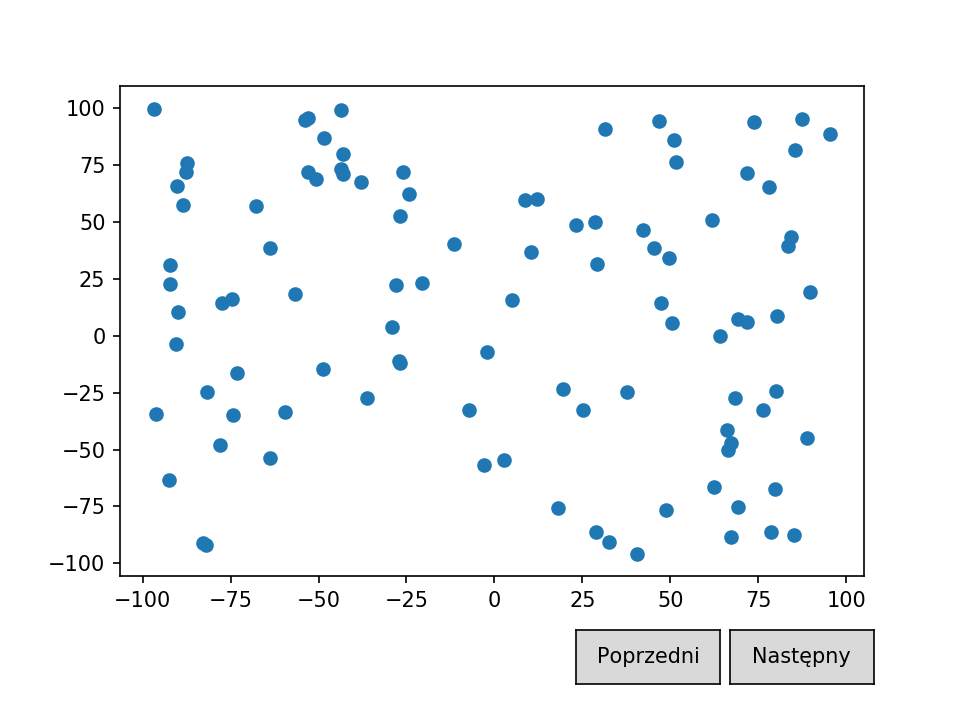

In [14]:
%matplotlib notebook

randomPoints = generate100RandomPointsBetween_100And100()
circlePoints = generate100RandomPointsOnCircleOf10Radius()
rectangularPoints = generate100RandomPointsOnRectangle()
squarePoints = generate49RandomPointsOnSquare()

scenes = [Scene([randomPoints]), Scene([circlePoints]), Scene([squarePoints]), Scene([rectangularPoints])]

plot = Plot(scenes)

plot.draw()

### Zadanie 3

In [15]:
%matplotlib notebook

def generateRandomPoints(no_points, lower_limit, upper_limit):
    points = PointsCollection([(random.uniform(lower_limit, upper_limit), random.uniform(lower_limit, upper_limit)) for i in range(no_points)])
    return points


def generateRandomPointsOnCircle(no_points, circle_center, radius):
    random_fi = [random.uniform(0, 2*np.pi) for i in range(no_points)]
    points = PointsCollection([(radius*np.cos(t)+circle_center[0], radius*np.sin(t)+circle_center[1]) for t in random_fi])
    return points


def generateRandomPointsOnRectangle(no_points, rect_vertices):
    base_point = rect_vertices[0]
    rect_vertices = sortPointsByDistanceTo(rect_vertices, base_point)
    
    vector_of_rect1 = createVector(base_point, rect_vertices[1])
    vector_of_rect2 = createVector(base_point, rect_vertices[2])
    
    prepared_points = []
    
    for i in range(no_points):
        fi = random.uniform(0, 1000)
            
        if fi < 250:
            t = random.uniform(0, 1)
            new_point = (rect_vertices[0][0] + vector_of_rect1[0]*t, rect_vertices[0][1] + vector_of_rect1[1]*t)
        elif fi < 500:
            t = random.uniform(0, 1)
            new_point = (rect_vertices[0][0] + vector_of_rect2[0]*t, rect_vertices[0][1] + vector_of_rect2[1]*t)
        elif fi < 750: 
            t = random.uniform(0, 1)
            new_point = (rect_vertices[1][0] + vector_of_rect2[0]*t, rect_vertices[1][1] + vector_of_rect2[1]*t)
        else:
            t = random.uniform(0, 1)
            new_point = (rect_vertices[2][0] + vector_of_rect1[0]*t, rect_vertices[2][1] + vector_of_rect1[1]*t)
        prepared_points.append(new_point)
    
    points = PointsCollection(prepared_points)
    return points


def sortPointsByDistanceTo(points, reference_point):
    distances = []
    
    for point in points:
        vector = createVector(reference_point, point)
        distance = vectorLength(vector)
        distances.append(distance)
    
    for index1 in range(len(points)):
        for index2 in range(index1, len(points)):
            if distances[index1] > distances[index2]:
                distances[index1], distances[index2] = distances[index2], distances[index1]
                points[index1], points[index2] = points[index2], points[index1] 
    
    return points


def createVector(point1, point2):
    return (point2[0]-point1[0], point2[1]-point1[1])


def vectorLength(vector):
    return np.sqrt(vector[0]**2 + vector[1]**2)
      
    
def generateRandomPointsOnSquare(sqr_vertices, no_points_on_axises, no_points_on_diagonals):
    prepared_points = sqr_vertices.copy()
    
    #prepared_points += generateRandomPointsOnAxises(sqr_vertices, no_points_on_axises)
    prepared_points += generateRandomPointsOnDiagonals(sqr_vertices, no_points_on_diagonals)
    
    points = PointsCollection(prepared_points)
    return points

    
def generateRandomPointsOnAxises(sqr_vertices, no_points):
    print(0)

    
def generateRandomPointsOnDiagonals(sqr_vertices, no_points):
    base_point1 = sqr_vertices[0]
    sqr_vertices = sortPointsByDistanceTo(sqr_vertices, base_point1)
    
    base_point2 = sqr_vertices[1]
    vector_of_diag1 = createVector(base_point1, sqr_vertices[3])
    vector_of_diag2 = createVector(base_point2, sqr_vertices[2])
    
    prepared_points = []
    
    for i in range(no_points):
        fi = random.uniform(-100, 100)
        t = random.uniform(0, 1)
        
        if fi > 0:
            new_point = (base_point1[0] + vector_of_diag1[0]*t, base_point1[1] + vector_of_diag1[1]*t)
        else:
            new_point = (base_point2[0] + vector_of_diag2[0]*t, base_point2[1] + vector_of_diag2[1]*t)
       
        prepared_points.append(new_point)
    
    return prepared_points

### Zadanie 3 - wizualizacja

<IPython.core.display.Javascript object>


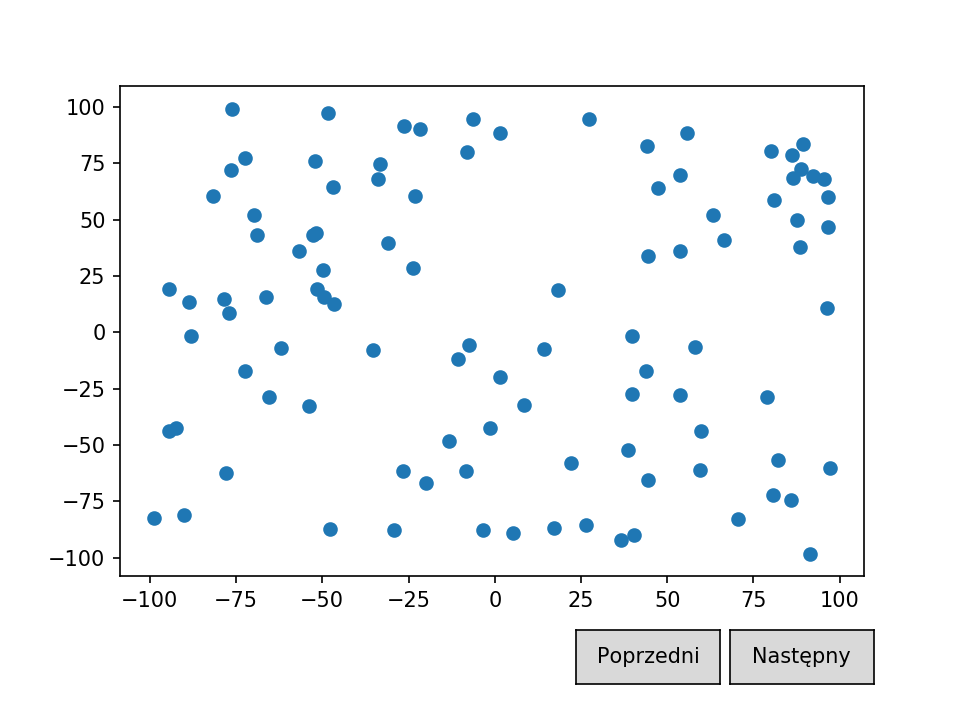

In [16]:
%matplotlib notebook

randomPoints = generateRandomPoints(100, -100, 100)
circlePoints = generateRandomPointsOnCircle(100, (5, 10), 5)
rectangularPoints = generateRandomPointsOnRectangle(100, [(-10, -10), (-10, 10), (10, -10), (10, 10)])
squarePoints = generateRandomPointsOnSquare([(0, 0), (10, 0), (10, 10), (0, 10)], 20, 25)

scenes = [Scene([randomPoints]), Scene([circlePoints]), Scene([rectangularPoints]), Scene([squarePoints])]

plot = Plot(scenes)

plot.draw()

### Zadanie 4 - algorytm Grahama

In [18]:
%matplotlib notebook

def grahamAlgorithm(points):
    
    reference_point = findMinYCoordPoint(points)
    #points.remove(np.all(reference_point))
    points = removeElement(points, reference_point)
    print(reference_point)
    
    points = sortByAngle(points, reference_point)
    print(points)
    
    areola = []
    areola.append(min_point)
    areola.append(points[0])
    areola.append(points[1])
    
    index = 3
    while index < len(points):
        stack_size = len(areola)
        point_t = areola[stack_size-1]
        point_t_1 = areola[stack_size-2]
        matrix = [[point_t_1[0], point_t_1[1], 1.0],[point_t[0], point_t_1[1], 1.0],[points[index][0], points[index][1], 1.0]]
        determinant = np.linalg.det(matrix)
        if determinant > 0:
            areola.append(point[index])
            index += 1
        else:
            areola.pop()
    
    return areola


def findMinYCoordPoint(set_of_points):
    min_point = (np.inf, np.inf)

    for point in set_of_points:
        if point[1] < min_point[1]:
            min_point = point
        elif point[1] == min_point[1] and point[0] < min_point[0]:
            min_point = point
        else:
            continue
            
    return min_point


def removeElement(points, point_to_remove):
    index = 0
    
    for point in points:
        if point_to_remove[0]==point[0] and point_to_remove[1]==point[1]:
            break
        index += 1
            
    while index < len(points)-1:
        points[index] = points[index+1]
        index += 1
        
    return points


def sortByAngle(points, reference_point):
    i_vector = (1, 0)
    anglesWithXAxis = []
    
    for point in points:
        vector = createVector(reference_point, point)
        angle = countAngleBetween(vector, i_vector)
        anglesWithXAxis.append(angle)
        
    for index1 in range(len(points)):
        for index2 in range(index1, len(points)):
            if anglesWithXAxis[index1] > anglesWithXAxis[index2]:
                anglesWithXAxis[index1], anglesWithXAxis[index2] = anglesWithXAxis[index2], anglesWithXAxis[index1]
                points[index1], points[index2] = points[index2], points[index1] 
             
    points = removeDuplicats(points, anglesWithXAxis, reference_point)
    return points
    

def countAngleBetween(vector1, vector2):
    cos_angle = scalarProductOf(vector1, vector2)/(vectorLength(vector1)*vectorLength(vector2))
    return np.arccos(cos_angle)
    
    
def scalarProductOf(vector1, vector2):
    return (vector1[0]*vector2[0]+vector1[1]*vector2[1])


def vectorLength(vector1):
    return np.square(vector1[0]**2 + vector1[1]**2)


def removeDuplicats(points, angles, reference_point):
    epsilon = 10**(-6)
    
    for index in range(len(angles)-1):
        if angles[index] - angles[index+1] < epsilon:
            vector1 = createVector(reference_point, points[index])
            vector2 = createVector(reference_point, points[index+1])
            if(vectorLength(vector1) < vectorLength(vector2)):
                points = removeElement(points, points[index])
                #angles = removeElement(angles, angles[index])
                #points.remove(points[index])
                angles.remove(angles[index])
            else:
                points = removeElement(points, points[index+1])
                #angles = removeElement(angles, angles[index+1])
                #points.remove(points[index+1])
                angles.remove(angles[index+1])
        #index -= 1
    return points

In [9]:
%matplotlib notebook

areola = grahamAlgorithm(randomPoints.points)

points_of_aureola = PointsCollection(areola)

scenes = [Scene([randomPoints]), Scene([points_of_aureola])]

plot = Plot(scenes)

plot.draw()


[-95.92124429 -70.80784279]


C:\Users\pastu\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in double_scalars


IndexError: list index out of range